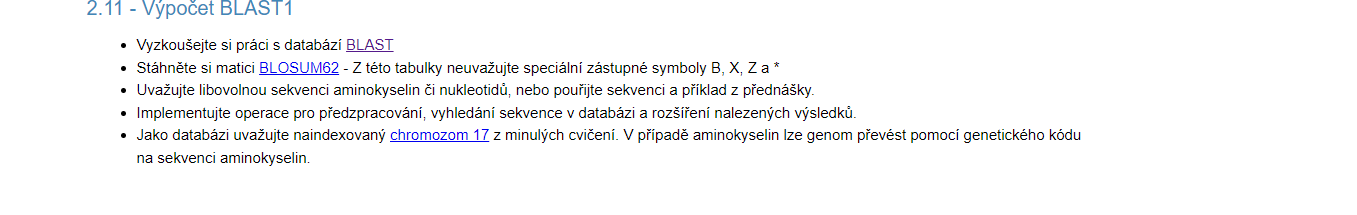

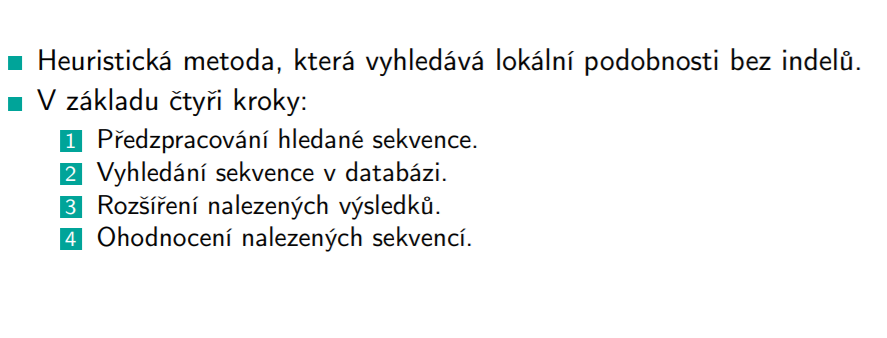

- Pro DNA stanovujeme w = 11
- Pro proteiny stanovujeme w = 3

Stanovit vyssi 11

In [2]:
import pandas as pd
import numpy as np

## Načtení matice do BLOSUM62

In [3]:
"""
    Načtení matice do dataframu..
"""
def load_matrix(input_path):
    df = pd.read_csv(input_path, sep=";", header=None)
    
    header = df.iloc[0, :].values
    header = list(filter(lambda x: not pd.isna(x), header))
    
    indicies = df.iloc[:, 0].values
    indicies = list(filter(lambda x: not pd.isna(x), indicies))
    
    return pd.DataFrame(df.iloc[1:, 1:-1].to_numpy(), columns=header, index=indicies)

In [4]:
path = f'data/tmp.txt'

In [5]:
df = load_matrix(path)

In [6]:
df.head()

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,*
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,...,-1,1,0,-3,-2,0,-2,-1,0,-4
R,-1,5,0,-2,-3,1,0,-2,0,-3,...,-2,-1,-1,-3,-2,-3,-1,0,-1,-4
N,-2,0,6,1,-3,0,0,0,1,-3,...,-2,1,0,-4,-2,-3,3,0,-1,-4
D,-2,-2,1,6,-3,0,2,-1,-1,-3,...,-1,0,-1,-4,-3,-3,4,1,-1,-4
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,...,-3,-1,-1,-2,-2,-1,-3,-3,-2,-4


# BLAST implementation

In [7]:
SIZE = 5000

In [32]:
def create_triples(seq):
    return [(i, seq[i:i+3]) for i in range(len(seq)-2)]

In [33]:
def preprocessing(seq):
    return create_triples(seq)

In [34]:
def load_chromozome(path):
    chr17 = ''
    with open(path, 'r') as f:
        chr17 = f.readlines()
        chr17 = chr17[1:]
        chr17 = [l.replace('\n', '').lower() for l in chr17]
    return ''.join(chr17)

In [35]:
path = f'.\data\chr17\chr17.fa'

In [36]:
ref = load_chromozome(path);

In [37]:
ref = ref.replace('n', '')

In [38]:
chrom = ref[0:SIZE]

In [39]:
aminoacid_replacements = {
    "ATG":"M",
    "TTT":"F",
    "TTC":"F",
    "TTA":"L",
    "TTG":"L",
    "TCT":"S",
    "TCC":"S",
    "TCA":"S",
    "TCG":"S",
    "TAT":"Y",
    "TAC":"Y",
    "TGT":"C",
    "TGC":"C",
    "TGG":"W",
    "CTT":"L",
    "CTC":"L",
    "CTA":"L",
    "CTG":"L",
    "CCT":"P",
    "CCC":"P",
    "CCA":"P",
    "CCG":"P",
    "CAT":"H",
    "CAC":"H",
    "CAA":"Q",
    "CAG":"Q",
    "CGT":"R",
    "CGC":"R",
    "CGA":"R",
    "CGG":"R",
    "ATT":"I",
    "ATC":"I",
    "ATA":"I",
    "ACT":"T",
    "ACC":"T",
    "ACA":"T",
    "ACG":"T",    
    "AAT":"N",
    "AAC":"N",
    "AAA":"K",
    "AAG":"K",
    "AGT":"S",
    "AGC":"S",
    "AGA":"R",
    "AGG":"R",
    "GTT":"V",
    "GTC":"V",
    "GTA":"V",
    "GTG":"V",
    "GCT":"A",
    "GCC":"A",
    "GCA":"A",
    "GCG":"A",
    "GAT":"D",
    "GAC":"D",
    "GAA":"E",
    "GAG":"E",
    "GGT":"G",
    "GGC":"G",
    "GGA":"G",
    "GGG":"G",
    "TAA":"",
    "TAG":"",
    "TGA":"",
}

In [40]:
def complement(seq):
    return seq.translate(str.maketrans({'T': 'A', 'A': 'T', 'G': 'C', 'C': 'G'}))

In [41]:
def create_translator(dic=aminoacid_replacements):
    def translate_to_amino_acid(gene):
        com = gene
        l = list(range(0, len(com), 3))
        acids = []
        for i in range(len(l) - 1):
            start = l[i]
            stop = l[i+1]
            g = com[start:stop].upper()
            acid = dic.get(g, "EMPTY")
            acids.append(acid)
        return ''.join(acids)
    return translate_to_amino_acid

In [42]:
trans = create_translator(aminoacid_replacements)

In [43]:
database = trans(chrom)

In [44]:
def blast(w, T, query_sequence):
    triples = preprocessing(query_sequence)
    print(triples)
    #print(w, T)
    

In [45]:
def score(a, b, df):
    size = len(a)
    scores = []
    
    for i in range(size):
        a_c = a[i]
        b_c = b[i]
        scores.append(int(df.loc[a_c, b_c]))
        
    return np.sum(scores)

In [46]:
score('TAA', 'TGA', df)

9

## Configuration

In [47]:
T = 11
DROP = 2
SEQ = 'YANCLEHKMGS'

## Blast

In [51]:
def search(data, query, t):
    res = []
    for q_i, query_triplet in preprocessing(query):
        for d_i, data_triplet in preprocessing(data):
            if score(query_triplet, data_triplet, df) >= t:
                res.append((q_i, query_triplet, d_i, data_triplet))
    return res

In [52]:
search(database, SEQ, T)

[(0, 'YAN', 22, 'YAH'),
 (1, 'ANC', 94, 'AGC'),
 (1, 'ANC', 150, 'AGC'),
 (1, 'ANC', 403, 'MNC'),
 (1, 'ANC', 417, 'SSC'),
 (1, 'ANC', 1110, 'AGC'),
 (2, 'NCL', 214, 'PCL'),
 (2, 'NCL', 312, 'SCL'),
 (2, 'NCL', 404, 'NCG'),
 (2, 'NCL', 491, 'PCL'),
 (2, 'NCL', 519, 'TCL'),
 (3, 'CLE', 215, 'CLN'),
 (3, 'CLE', 313, 'CLS'),
 (3, 'CLE', 354, 'CLP'),
 (3, 'CLE', 426, 'CEE'),
 (3, 'CLE', 520, 'CLT'),
 (3, 'CLE', 932, 'CLP'),
 (3, 'CLE', 1112, 'CWE'),
 (3, 'CLE', 1192, 'CWE'),
 (3, 'CLE', 1294, 'CPE'),
 (3, 'CLE', 1590, 'CLT'),
 (5, 'EHK', 154, 'AHK'),
 (5, 'EHK', 527, 'ENK'),
 (6, 'HKM', 155, 'HKP'),
 (6, 'HKM', 401, 'HTM'),
 (6, 'HKM', 422, 'YKM'),
 (6, 'HKM', 674, 'HEL'),
 (7, 'KMG', 1265, 'EMG'),
 (7, 'KMG', 1319, 'KLG'),
 (7, 'KMG', 1463, 'KLG'),
 (7, 'KMG', 1514, 'KFG'),
 (7, 'KMG', 1556, 'KVG'),
 (8, 'MGS', 298, 'LGS'),
 (8, 'MGS', 1469, 'IGS')]

In [172]:
def search_with_extension(data, query, t, max_drop_off):
    results = search(data, query, t)
    new_results = []
    
    for res in results:        
        seq_index, seq_f, data_index, data_f  = res
    
        #score, seq_index, seq, data_index, data_f
        init_score = score(seq_f, data_f, df)
        history = [(init_score, seq_index, seq_f, data_index, data_f)]
        
        start = seq_index + 3
        steps = len(query) - start
        scores = [init_score]
        
        
        run = True
        
        #extend to right
        for i in range(1, steps):
            s_i = start + i
            d_i = data_index + 3 + i
            
            if d_i >= len(data):
                break
            
            previous_score = history[-1][0]
            current_score = score(query[seq_index:s_i], data[data_index:d_i], df)
            current_drop = current_score - previous_score
            
            if len(scores) == 1 or (np.max(scores) - np.min(scores)) <= max_drop_off:
                scores.append(current_score)
                history.append((current_score, seq_index, seq_f + query[start:s_i], data_index, data_f + data[data_index+3:d_i]))
            else:
                run = False
                break
         
        
        
        #extend to left
        if run:
            for i in range(seq_index-1, -1, -1):
                s_i = i
                d_i = data_index - i


                if d_i < 0:
                    break


                s_c = query[s_i]
                d_c = data[d_i]

                new_seq = s_c + history[-1][2]
                new_db = d_c + history[-1][4]


                previous_score = history[-1][0]
                current_score = score(new_seq, new_db, df)    
                current_drop = current_score - previous_score


                if len(scores) == 1 or (np.max(scores) - np.min(scores)) <= max_drop_off:
                    scores.append(current_score) 
                    history.append((current_score, history[-1][1] - 1, new_seq, history[-1][3] - 1, new_db))
                else:
                    break

    
        new_results.append(list(sorted(history, key=lambda x: (x[0], len(x[2])), reverse=True))[0])
    return results, new_results

In [173]:
search_with_extension(database, SEQ, T, DROP)

([(0, 'YAN', 22, 'YAH'),
  (1, 'ANC', 94, 'AGC'),
  (1, 'ANC', 150, 'AGC'),
  (1, 'ANC', 403, 'MNC'),
  (1, 'ANC', 417, 'SSC'),
  (1, 'ANC', 1110, 'AGC'),
  (2, 'NCL', 214, 'PCL'),
  (2, 'NCL', 312, 'SCL'),
  (2, 'NCL', 404, 'NCG'),
  (2, 'NCL', 491, 'PCL'),
  (2, 'NCL', 519, 'TCL'),
  (3, 'CLE', 215, 'CLN'),
  (3, 'CLE', 313, 'CLS'),
  (3, 'CLE', 354, 'CLP'),
  (3, 'CLE', 426, 'CEE'),
  (3, 'CLE', 520, 'CLT'),
  (3, 'CLE', 932, 'CLP'),
  (3, 'CLE', 1112, 'CWE'),
  (3, 'CLE', 1192, 'CWE'),
  (3, 'CLE', 1294, 'CPE'),
  (3, 'CLE', 1590, 'CLT'),
  (5, 'EHK', 154, 'AHK'),
  (5, 'EHK', 527, 'ENK'),
  (6, 'HKM', 155, 'HKP'),
  (6, 'HKM', 401, 'HTM'),
  (6, 'HKM', 422, 'YKM'),
  (6, 'HKM', 674, 'HEL'),
  (7, 'KMG', 1265, 'EMG'),
  (7, 'KMG', 1319, 'KLG'),
  (7, 'KMG', 1463, 'KLG'),
  (7, 'KMG', 1514, 'KFG'),
  (7, 'KMG', 1556, 'KVG'),
  (8, 'MGS', 298, 'LGS'),
  (8, 'MGS', 1469, 'IGS')],
 [(12, 0, 'YAN', 22, 'YAH'),
  (13, 1, 'ANC', 94, 'AGC'),
  (13, 1, 'ANC', 150, 'AGC'),
  (14, 1, 'ANC', 4